# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver.  

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks shops in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

In [29]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(sf))
denver <- readr::read_csv('data/denver.csv', show_col_types = FALSE)
denver

StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NA,NA,80204,-105.01,39.75
75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NA,NA,802023940,-104.99,39.75
74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NA,NA,802104528,-104.97,39.68
22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NA,NA,80211,-105.02,39.76
11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NA,NA,802122001,-105.05,39.77
75003-33060,King Soopers-Denver #29,303-832-5262,1155 E. 9th Ave.,NA,Capitol Hill Center,802184802,-104.97,39.73
19695-165566,"Hampden & Santa Fe, Sheridan",3037611675,3500 A River Point Parkway,NA,NA,80110,-105.01,39.65
74108-17656,Safeway-Denver #1267,303-691-8870,6460 East Yale Ave,NA,NA,802227156,-104.91,39.67
18946-177247,Target Denver T-2820,303-481-2821,7777 E. Hampden Ave,NA,NA,80231,-104.90,39.65


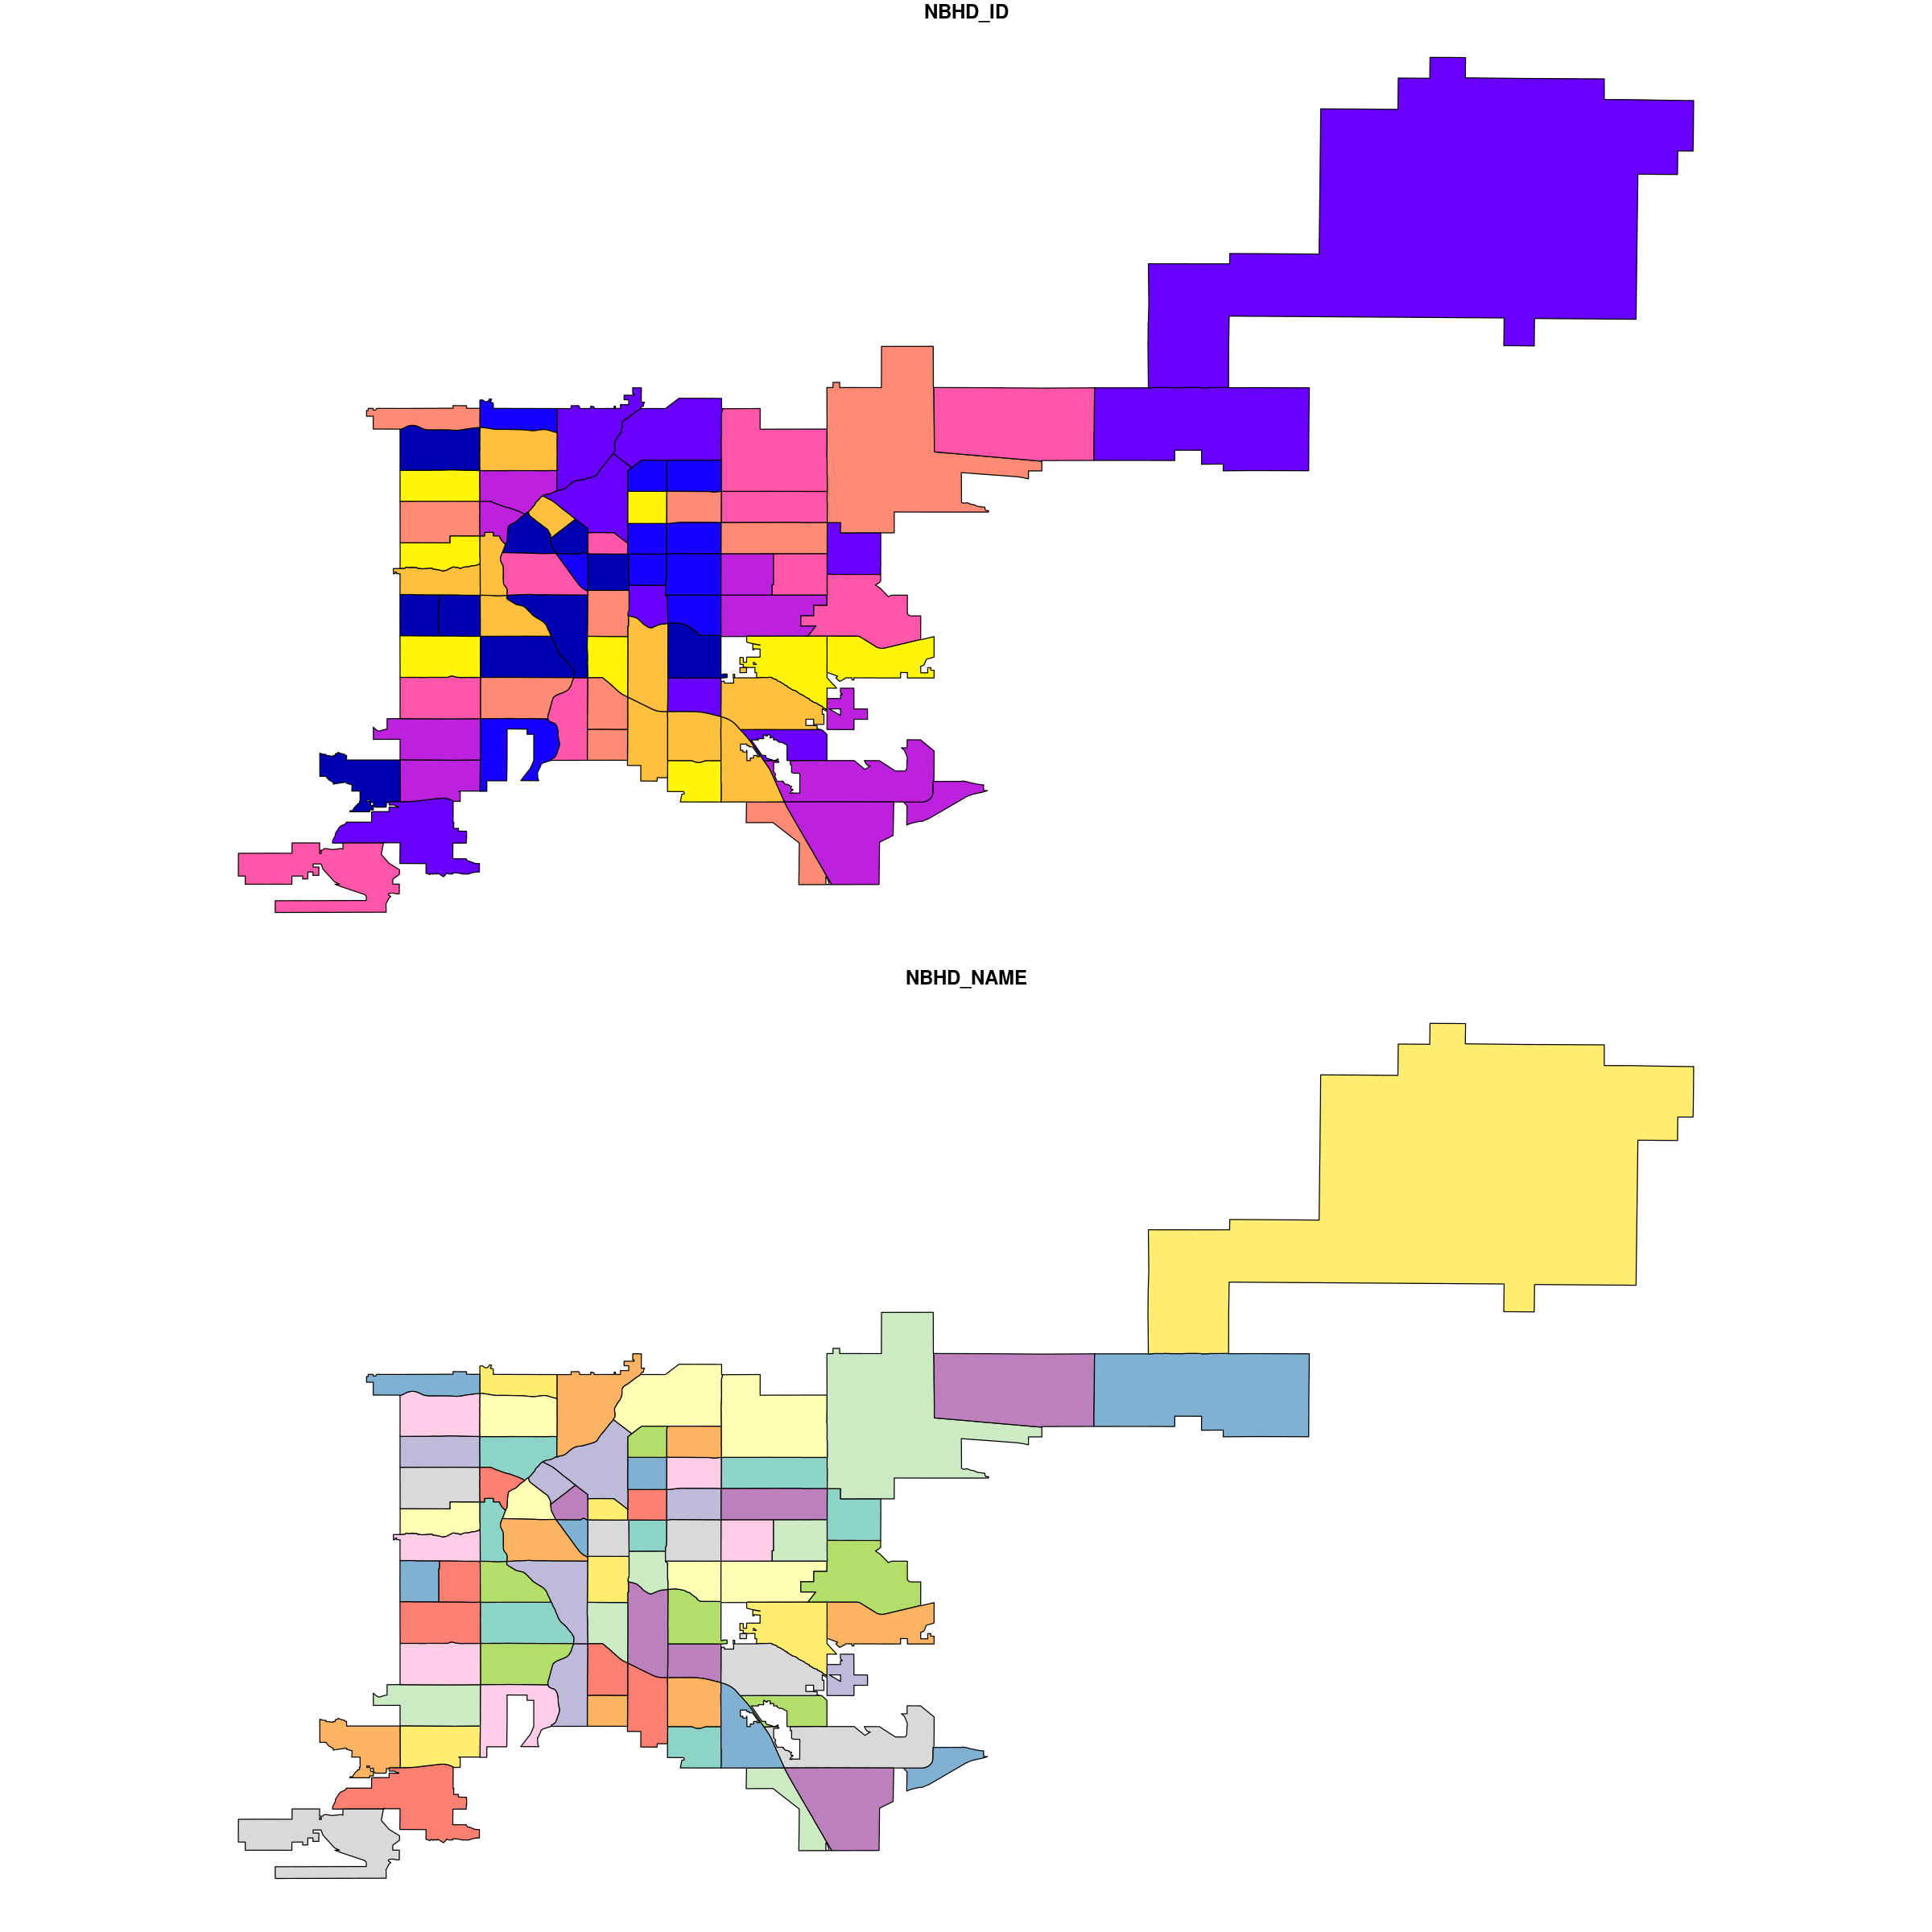

In [30]:
neighborhoods <- st_read("data/neighborhoods.shp", quiet=TRUE)
plot(neighborhoods)

In [31]:
census <- readr::read_csv('data/census.csv', show_col_types = FALSE)
census

NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Athmar Park,8898,2649,2406,3112,731,2781,1964,425
2,Auraria,705,7,635,57,6,60,15,NA
3,Baker,4879,745,1762,2037,335,2447,833,NA
4,Barnum,6111,2015,1647,2089,360,1782,1289,120
5,Barnum West,5376,1579,1380,1824,593,1704,1207,NA
6,Bear Valley,8889,2036,2375,3190,1288,3652,2285,862
7,Belcaro,4172,646,621,1913,992,2126,1162,NA
8,Berkeley,8112,1305,2270,3513,1024,4049,1843,1510
9,Capitol Hill,14708,408,8274,5155,871,10856,1201,1223


In [32]:
install.packages("kableExtra")
library(kableExtra)

Installing kableExtra [1.3.4] ...
	OK [linked cache]


## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

In [33]:
# Olhando o censo
census_analytics <- census %>% mutate(across(4:7, ~./POPULATION_2010),HpF = NUM_HOUSEHOLDS/FAMILIES, p100K = `NUM_HHLD_100K+`/NUM_HOUSEHOLDS)

census_analytics

NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,HpF,p100K
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Athmar Park,8898,0.297707350,0.2703978,0.34974151,0.082153293,2781,1964,425,1.415988,0.15282273
2,Auraria,705,0.009929078,0.9007092,0.08085106,0.008510638,60,15,NA,4.000000,NA
3,Baker,4879,0.152695224,0.3611396,0.41750359,0.068661611,2447,833,NA,2.937575,NA
4,Barnum,6111,0.329733268,0.2695140,0.34184258,0.058910162,1782,1289,120,1.382467,0.06734007
5,Barnum West,5376,0.293712798,0.2566964,0.33928571,0.110305060,1704,1207,NA,1.411765,NA
6,Bear Valley,8889,0.229047137,0.2671842,0.35887051,0.144898189,3652,2285,862,1.598249,0.23603505
7,Belcaro,4172,0.154841802,0.1488495,0.45853308,0.237775647,2126,1162,NA,1.829604,NA
8,Berkeley,8112,0.160872781,0.2798323,0.43306213,0.126232742,4049,1843,1510,2.196961,0.37293159
9,Capitol Hill,14708,0.027740005,0.5625510,0.35048953,0.059219472,10856,1201,1223,9.039134,0.11265660


In [34]:
# estimando o n de households 100k+
census_analytics_lm <- census_analytics %>% select(-c(1,2,10,11)) %>% drop_na()

lm_100k <- lm(p100K ~ ., data = census_analytics_lm)
summary(lm_100k)

# aplicando para os valores NA
census_analytics_na <- census_analytics %>% select(-c(1,10,11)) %>% filter(is.na(p100K))
census_analytics_nan <- census_analytics_na %>% select(-1)

estimat <- predict(lm_100k, newdata = census_analytics_nan)
estimat

census_analytics_na$estimat <- estimat
census_analytics_na <- census_analytics_na %>% mutate(estimat = ifelse(estimat < 0, 0, estimat))
census_analytics_na



Call:
lm(formula = p100K ~ ., data = census_analytics_lm)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.204828 -0.055504 -0.008697  0.032415  0.248549 

Coefficients: (1 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.738e-01  3.418e-01  -0.801  0.42767    
POPULATION_2010  2.193e-05  1.715e-05   1.279  0.20816    
AGE_LESS_18     -1.093e+00  4.393e-01  -2.488  0.01699 *  
AGE_18_TO_34     6.672e-02  3.943e-01   0.169  0.86648    
AGE_35_TO_65     2.062e+00  4.624e-01   4.459 6.27e-05 ***
AGE_65_PLUS             NA         NA      NA       NA    
NUM_HOUSEHOLDS  -6.705e-05  1.958e-05  -3.424  0.00141 ** 
FAMILIES         1.430e-05  6.013e-05   0.238  0.81318    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09418 on 41 degrees of freedom
Multiple R-squared:  0.6584,	Adjusted R-squared:  0.6084 
F-statistic: 13.17 on 6 and 41 DF,  p-value: 3.012e-08


Warning message in predict.lm(lm_100k, newdata = census_analytics_nan):
“prediction from a rank-deficient fit may be misleading”


1           2           3           4           5           6 
-0.04623554  0.39903871  0.14269796  0.47784760  0.26674380  0.28243896 
          7           8           9          10          11          12 
 0.35191172  0.44333978  0.61432707  0.07332967  0.09765147  0.43058842 
         13          14          15          16          17          18 
 0.52194459  0.10515176  0.13837921  0.54713741  0.19251635  0.11621876 
         19          20          21          22          23          24 
 0.49526510  0.33181622  0.48460726  0.36571979  0.35567260  0.31357421 
         25          26          27          28          29          30 
 0.26811619 -0.47756691  0.47841910  0.05803105  0.40317862  0.24472454

NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,p100K,estimat
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Auraria,705,0.009929078,0.9007092,0.08085106,0.008510638,60,15,NA,0.00000000
Baker,4879,0.152695224,0.3611396,0.41750359,0.068661611,2447,833,NA,0.39903871
Barnum West,5376,0.293712798,0.2566964,0.33928571,0.110305060,1704,1207,NA,0.14269796
Belcaro,4172,0.154841802,0.1488495,0.45853308,0.237775647,2126,1162,NA,0.47784760
CBD,3648,0.023026316,0.6271930,0.29002193,0.059758772,2363,303,NA,0.26674380
Chaffee Park,3874,0.229736706,0.2609706,0.38203407,0.127258647,1416,858,NA,0.28243896
City Park,2907,0.108703130,0.4152047,0.36704506,0.109047128,1645,462,NA,0.35191172
City Park West,4844,0.093517754,0.3899670,0.41288192,0.103633361,2574,588,NA,0.44333978
Civic Center,1577,0.027901078,0.4546607,0.44958782,0.067850349,1140,222,NA,0.61432707


In [35]:
# Tabela com os dados ajustados
census_analytics <- left_join(census_analytics, census_analytics_na[,c(1,10)], by = "NBHD_NAME")
census_analytics <- census_analytics %>% mutate(`NUM_HHLD_100K+` = ifelse(is.na(`NUM_HHLD_100K+`), round(NUM_HOUSEHOLDS * estimat,0), `NUM_HHLD_100K+`)) %>% select(-c(12,13)) %>% mutate(p100k = `NUM_HHLD_100K+`/NUM_HOUSEHOLDS)

census_analytics
summary(census_analytics)

NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,HpF,p100k
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Athmar Park,8898,0.297707350,0.2703978,0.34974151,0.082153293,2781,1964,425,1.415988,0.15282273
2,Auraria,705,0.009929078,0.9007092,0.08085106,0.008510638,60,15,0,4.000000,0.00000000
3,Baker,4879,0.152695224,0.3611396,0.41750359,0.068661611,2447,833,976,2.937575,0.39885574
4,Barnum,6111,0.329733268,0.2695140,0.34184258,0.058910162,1782,1289,120,1.382467,0.06734007
5,Barnum West,5376,0.293712798,0.2566964,0.33928571,0.110305060,1704,1207,243,1.411765,0.14260563
6,Bear Valley,8889,0.229047137,0.2671842,0.35887051,0.144898189,3652,2285,862,1.598249,0.23603505
7,Belcaro,4172,0.154841802,0.1488495,0.45853308,0.237775647,2126,1162,1016,1.829604,0.47789276
8,Berkeley,8112,0.160872781,0.2798323,0.43306213,0.126232742,4049,1843,1510,2.196961,0.37293159
9,Capitol Hill,14708,0.027740005,0.5625510,0.35048953,0.059219472,10856,1201,1223,9.039134,0.11265660


    NBHD_ID       NBHD_NAME         POPULATION_2010  AGE_LESS_18      
 Min.   : 1.00   Length:78          Min.   :  705   Min.   :0.009929  
 1st Qu.:20.25   Class :character   1st Qu.: 4213   1st Qu.:0.146247  
 Median :39.50   Mode  :character   Median : 6702   Median :0.191156  
 Mean   :39.50                      Mean   : 7694   Mean   :0.200264  
 3rd Qu.:58.75                      3rd Qu.: 9640   3rd Qu.:0.263230  
 Max.   :78.00                      Max.   :30348   Max.   :0.540055  
  AGE_18_TO_34     AGE_35_TO_65      AGE_65_PLUS       NUM_HOUSEHOLDS 
 Min.   :0.1181   Min.   :0.08085   Min.   :0.008511   Min.   :   60  
 1st Qu.:0.2595   1st Qu.:0.33987   1st Qu.:0.068454   1st Qu.: 1774  
 Median :0.2838   Median :0.36764   Median :0.098464   Median : 3086  
 Mean   :0.3217   Mean   :0.37351   Mean   :0.104528   Mean   : 3373  
 3rd Qu.:0.3771   3rd Qu.:0.41680   3rd Qu.:0.133566   3rd Qu.: 3986  
 Max.   :0.9007   Max.   :0.50450   Max.   :0.268727   Max.   :10856  
    FA

In [36]:
# Escolhendo as melhores localizações
best_places <- census_analytics %>% select(NBHD_ID,NBHD_NAME,AGE_18_TO_34,POPULATION_2010,p100k) %>%
				mutate(Pcust = POPULATION_2010 * AGE_18_TO_34 ,Pop = ntile(Pcust,5),Score = (AGE_18_TO_34*0.5 + p100k*0.3 + (Pop/5)*0.2)*200) %>% arrange(desc(Score))

best_places
places_map <- neighborhoods %>% filter(NBHD_ID %in% c(64,60,47,9,59))
potplaces_map <- neighborhoods %>% filter(NBHD_ID %in% c(10,26,2,36,20))

NBHD_ID,NBHD_NAME,AGE_18_TO_34,POPULATION_2010,p100k,Pcust,Pop,Score
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
64,University,0.6169600,9375,0.2636339,5784,5,117.51404
60,Central Park,0.2873530,13948,0.6715543,4008,5,109.02856
47,North Capitol Hill,0.5560708,5823,0.2622695,3238,4,103.34325
9,Capitol Hill,0.5625510,14708,0.1126566,8274,5,103.01449
59,Speer,0.4894103,10954,0.2302848,5361,5,102.75811
10,CBD,0.6271930,3648,0.2666102,2288,3,102.71591
26,Five Points,0.4689270,12712,0.2622541,5961,5,102.62795
2,Auraria,0.9007092,705,0.0000000,635,1,98.07092
36,Highland,0.3878277,8429,0.4124909,3269,4,95.53223


In [37]:
# Colocando as melhores localizações no mapa
map_data <- left_join(neighborhoods, best_places[,c(-2)], by = "NBHD_ID")

# Transformando as coordenadas em shape file
denver_sf <- denver %>% st_as_sf(coords = c("Longitude","Latitude"))

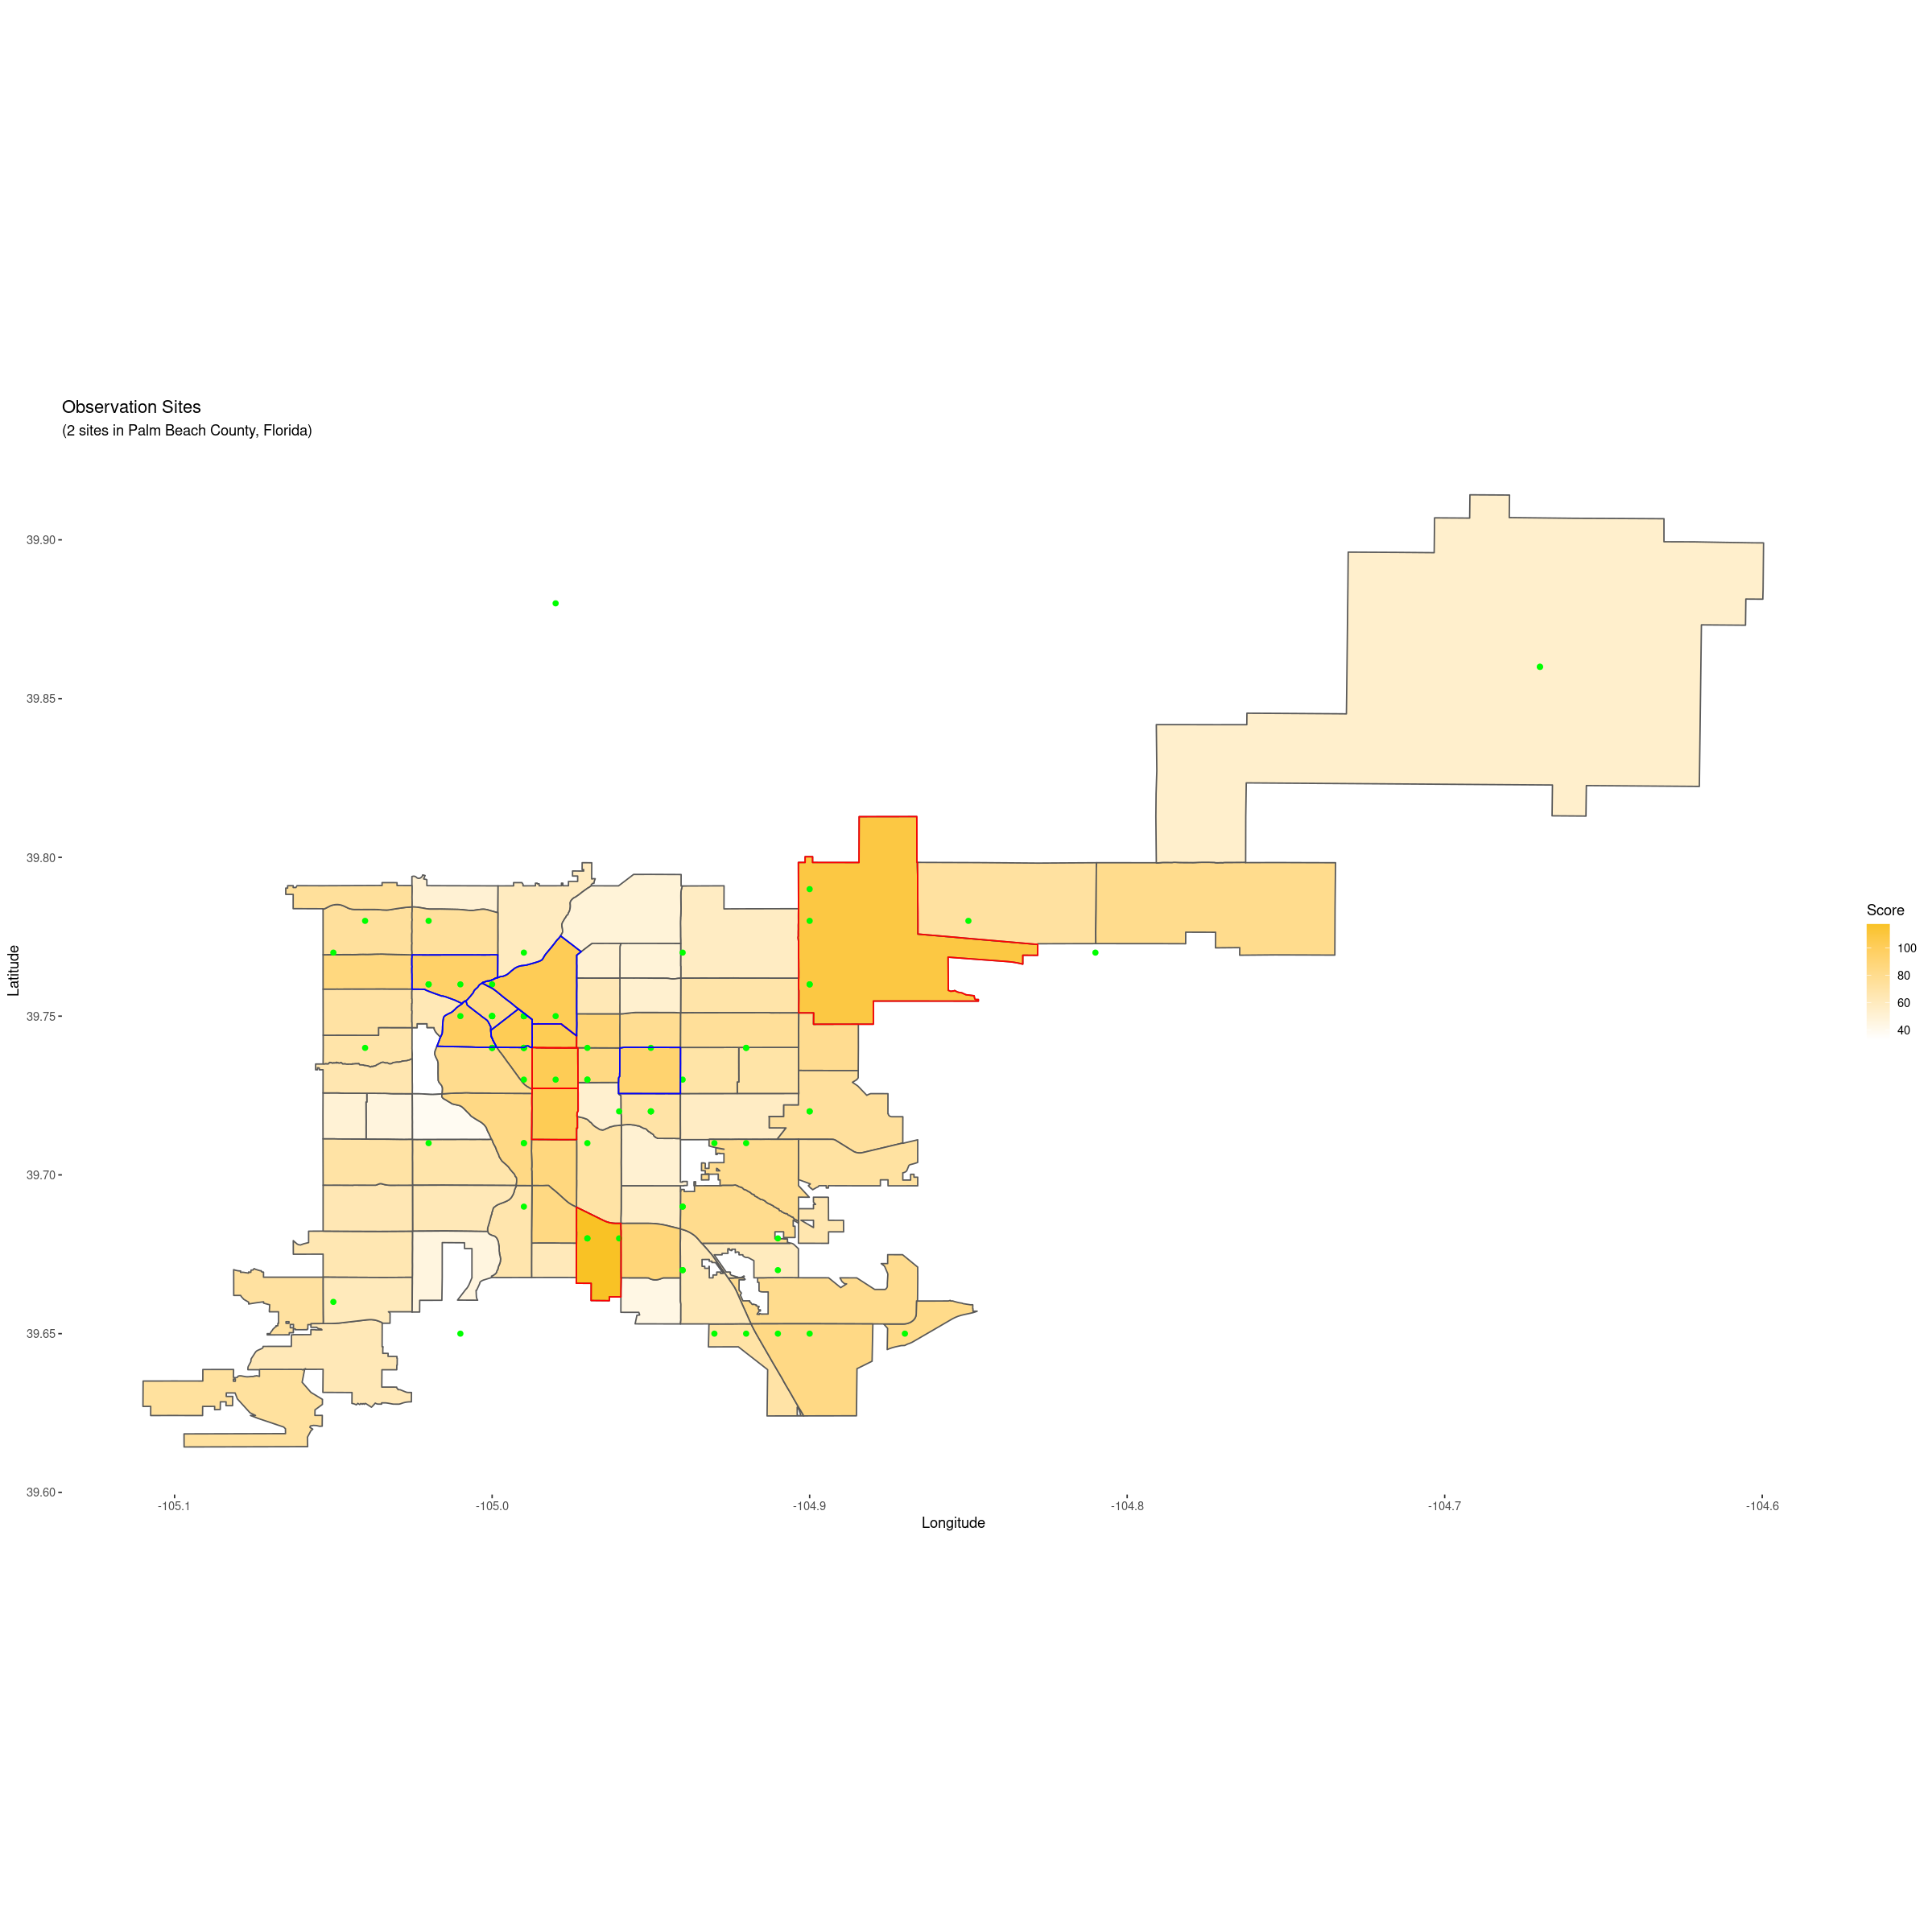

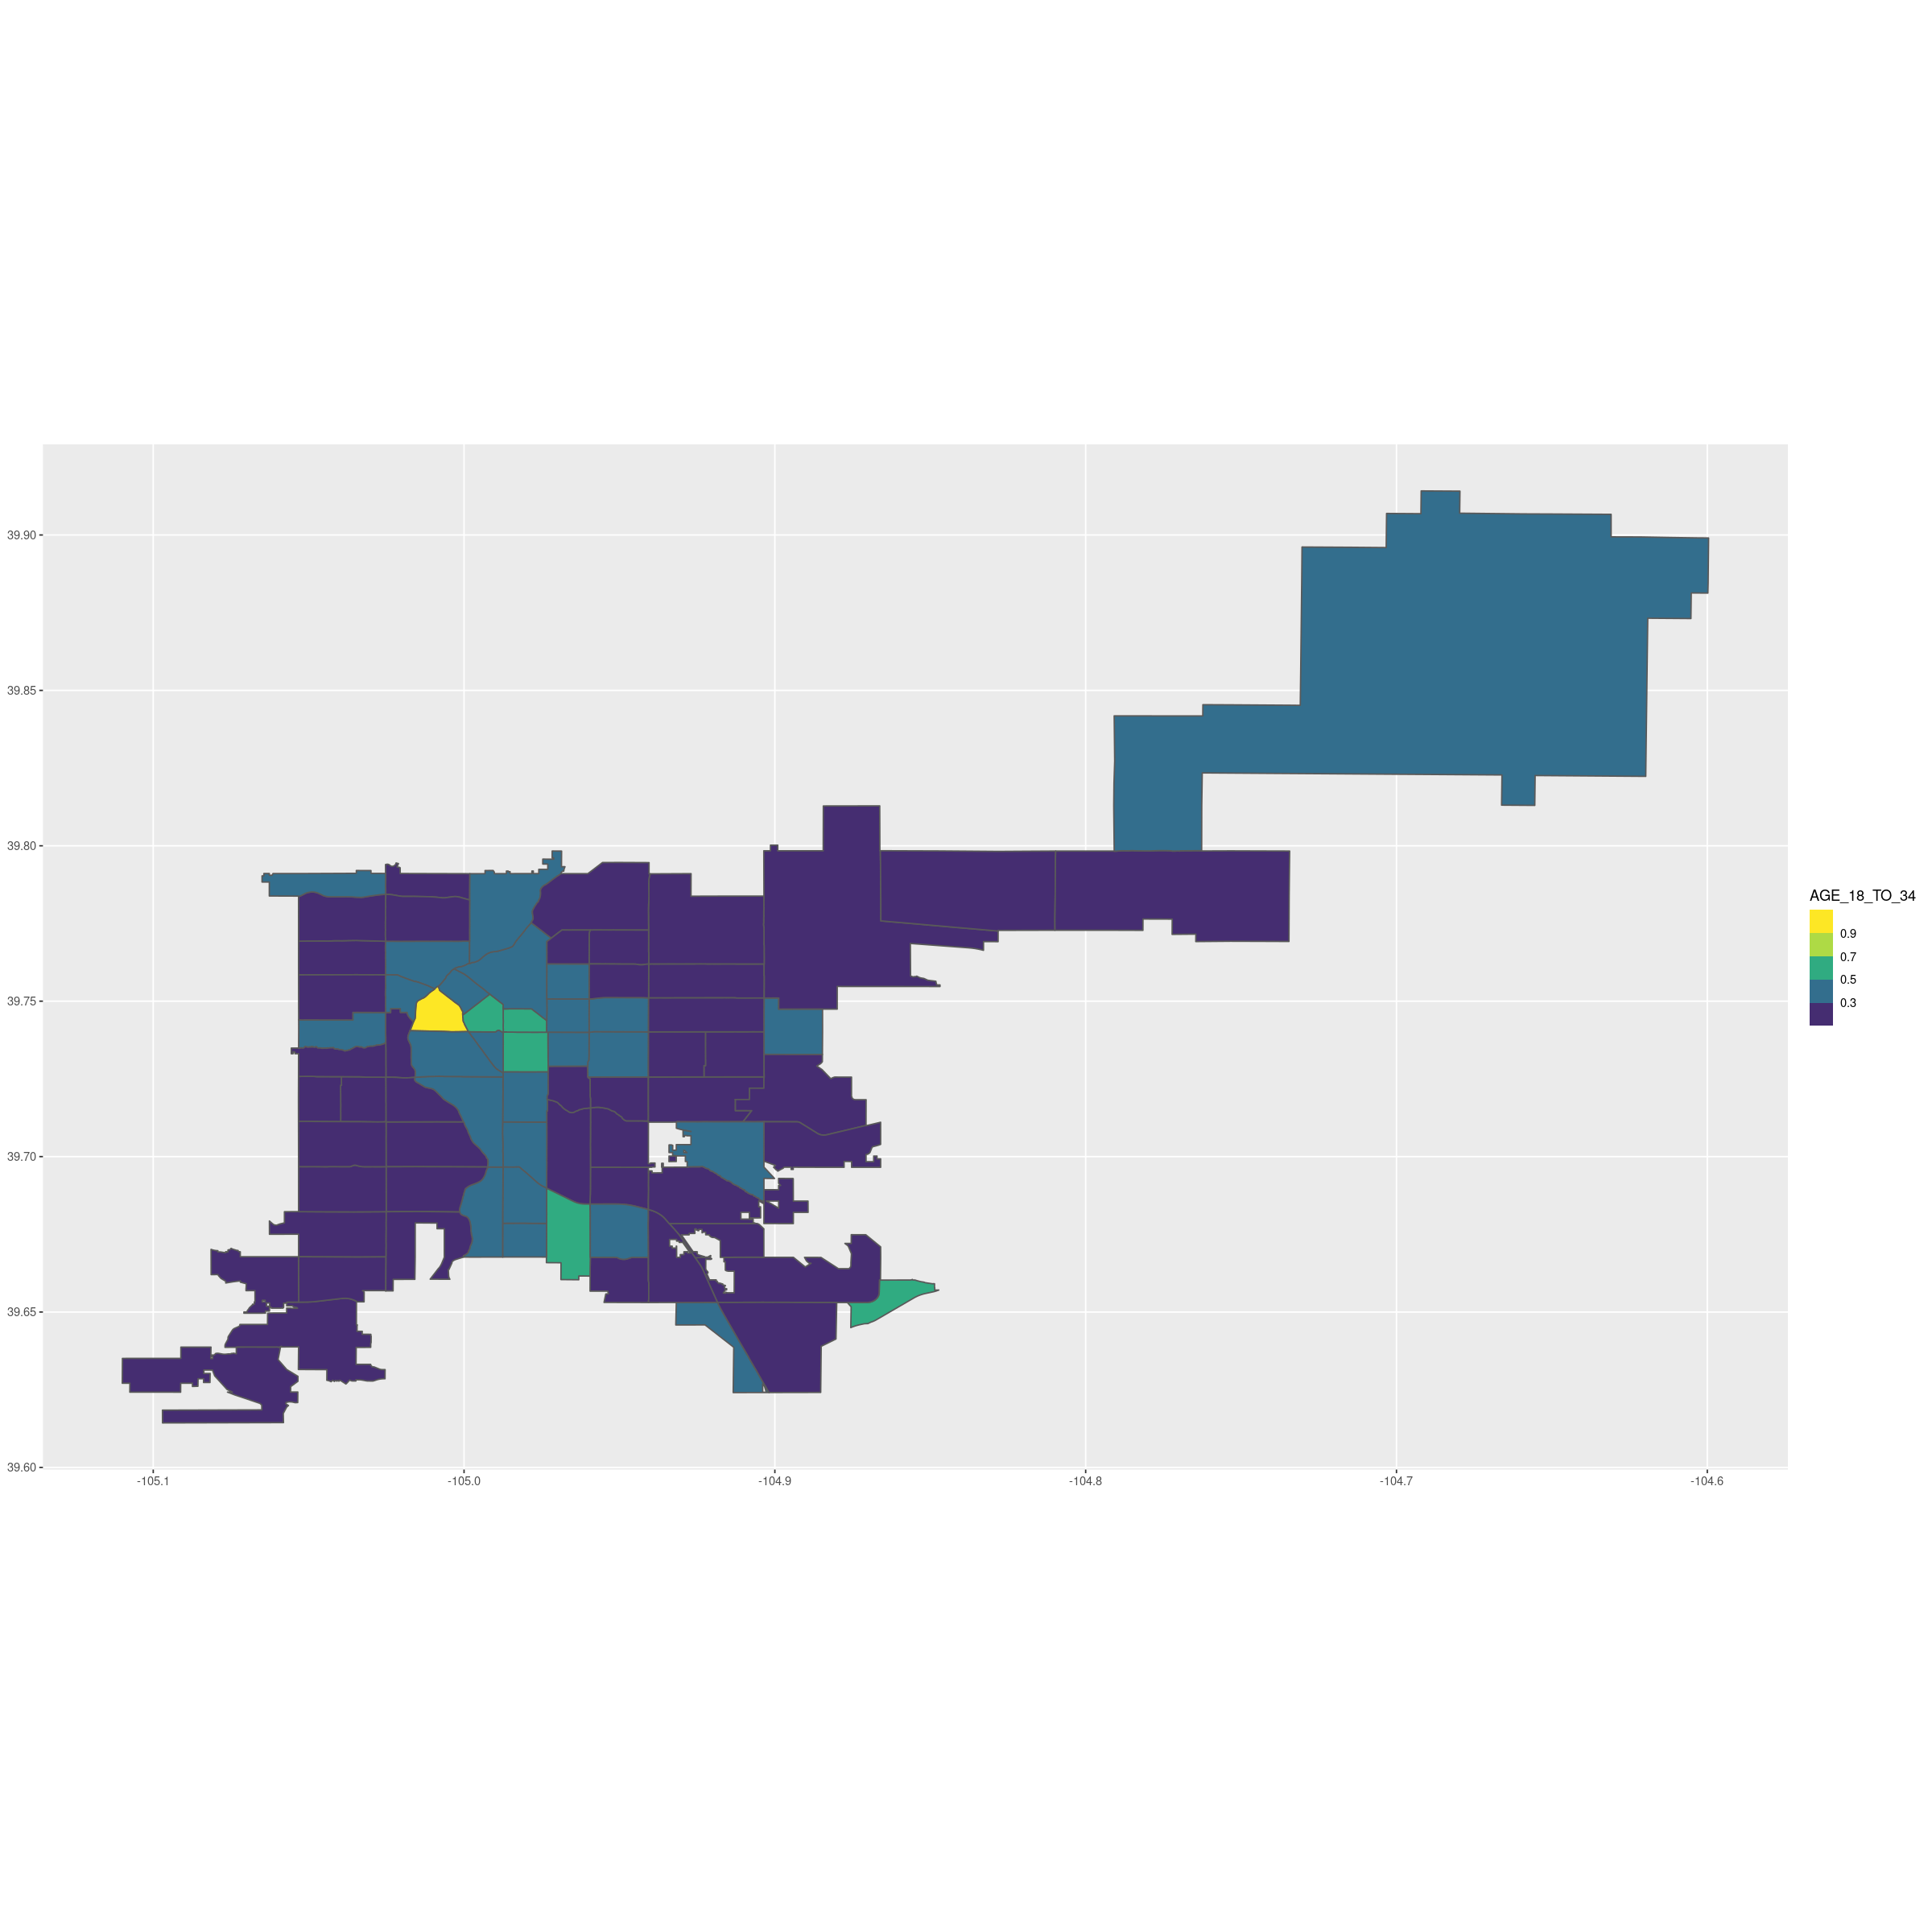

In [38]:
options(repr.plot.width = 20, repr.plot.height =20)


# Map with the best places, with the starbucks locations
p <- map_data %>% ggplot() + geom_sf(aes(fill = Score)) + scale_fill_gradient(low = "#ffffff", high = "#f9c225")
p <- p + geom_sf(data = denver_sf, color = "green") + geom_sf(data = places_map,fill = NA, color = "red") + geom_sf(data = potplaces_map, fill = 	 NA, color = "blue") + xlab("Longitude") + ylab("Latitude") +
     ggtitle("Observation Sites", subtitle = "(2 sites in Palm Beach County, Florida)") +
     theme(panel.grid.major = element_line(color = "white", linetype = "dashed",size = 0.5),
           panel.background = element_rect(fill = "white"))
p

# Population by neighboord
ggplot() + geom_sf(data = map_data, aes(fill = AGE_18_TO_34)) + scale_fill_viridis_b()

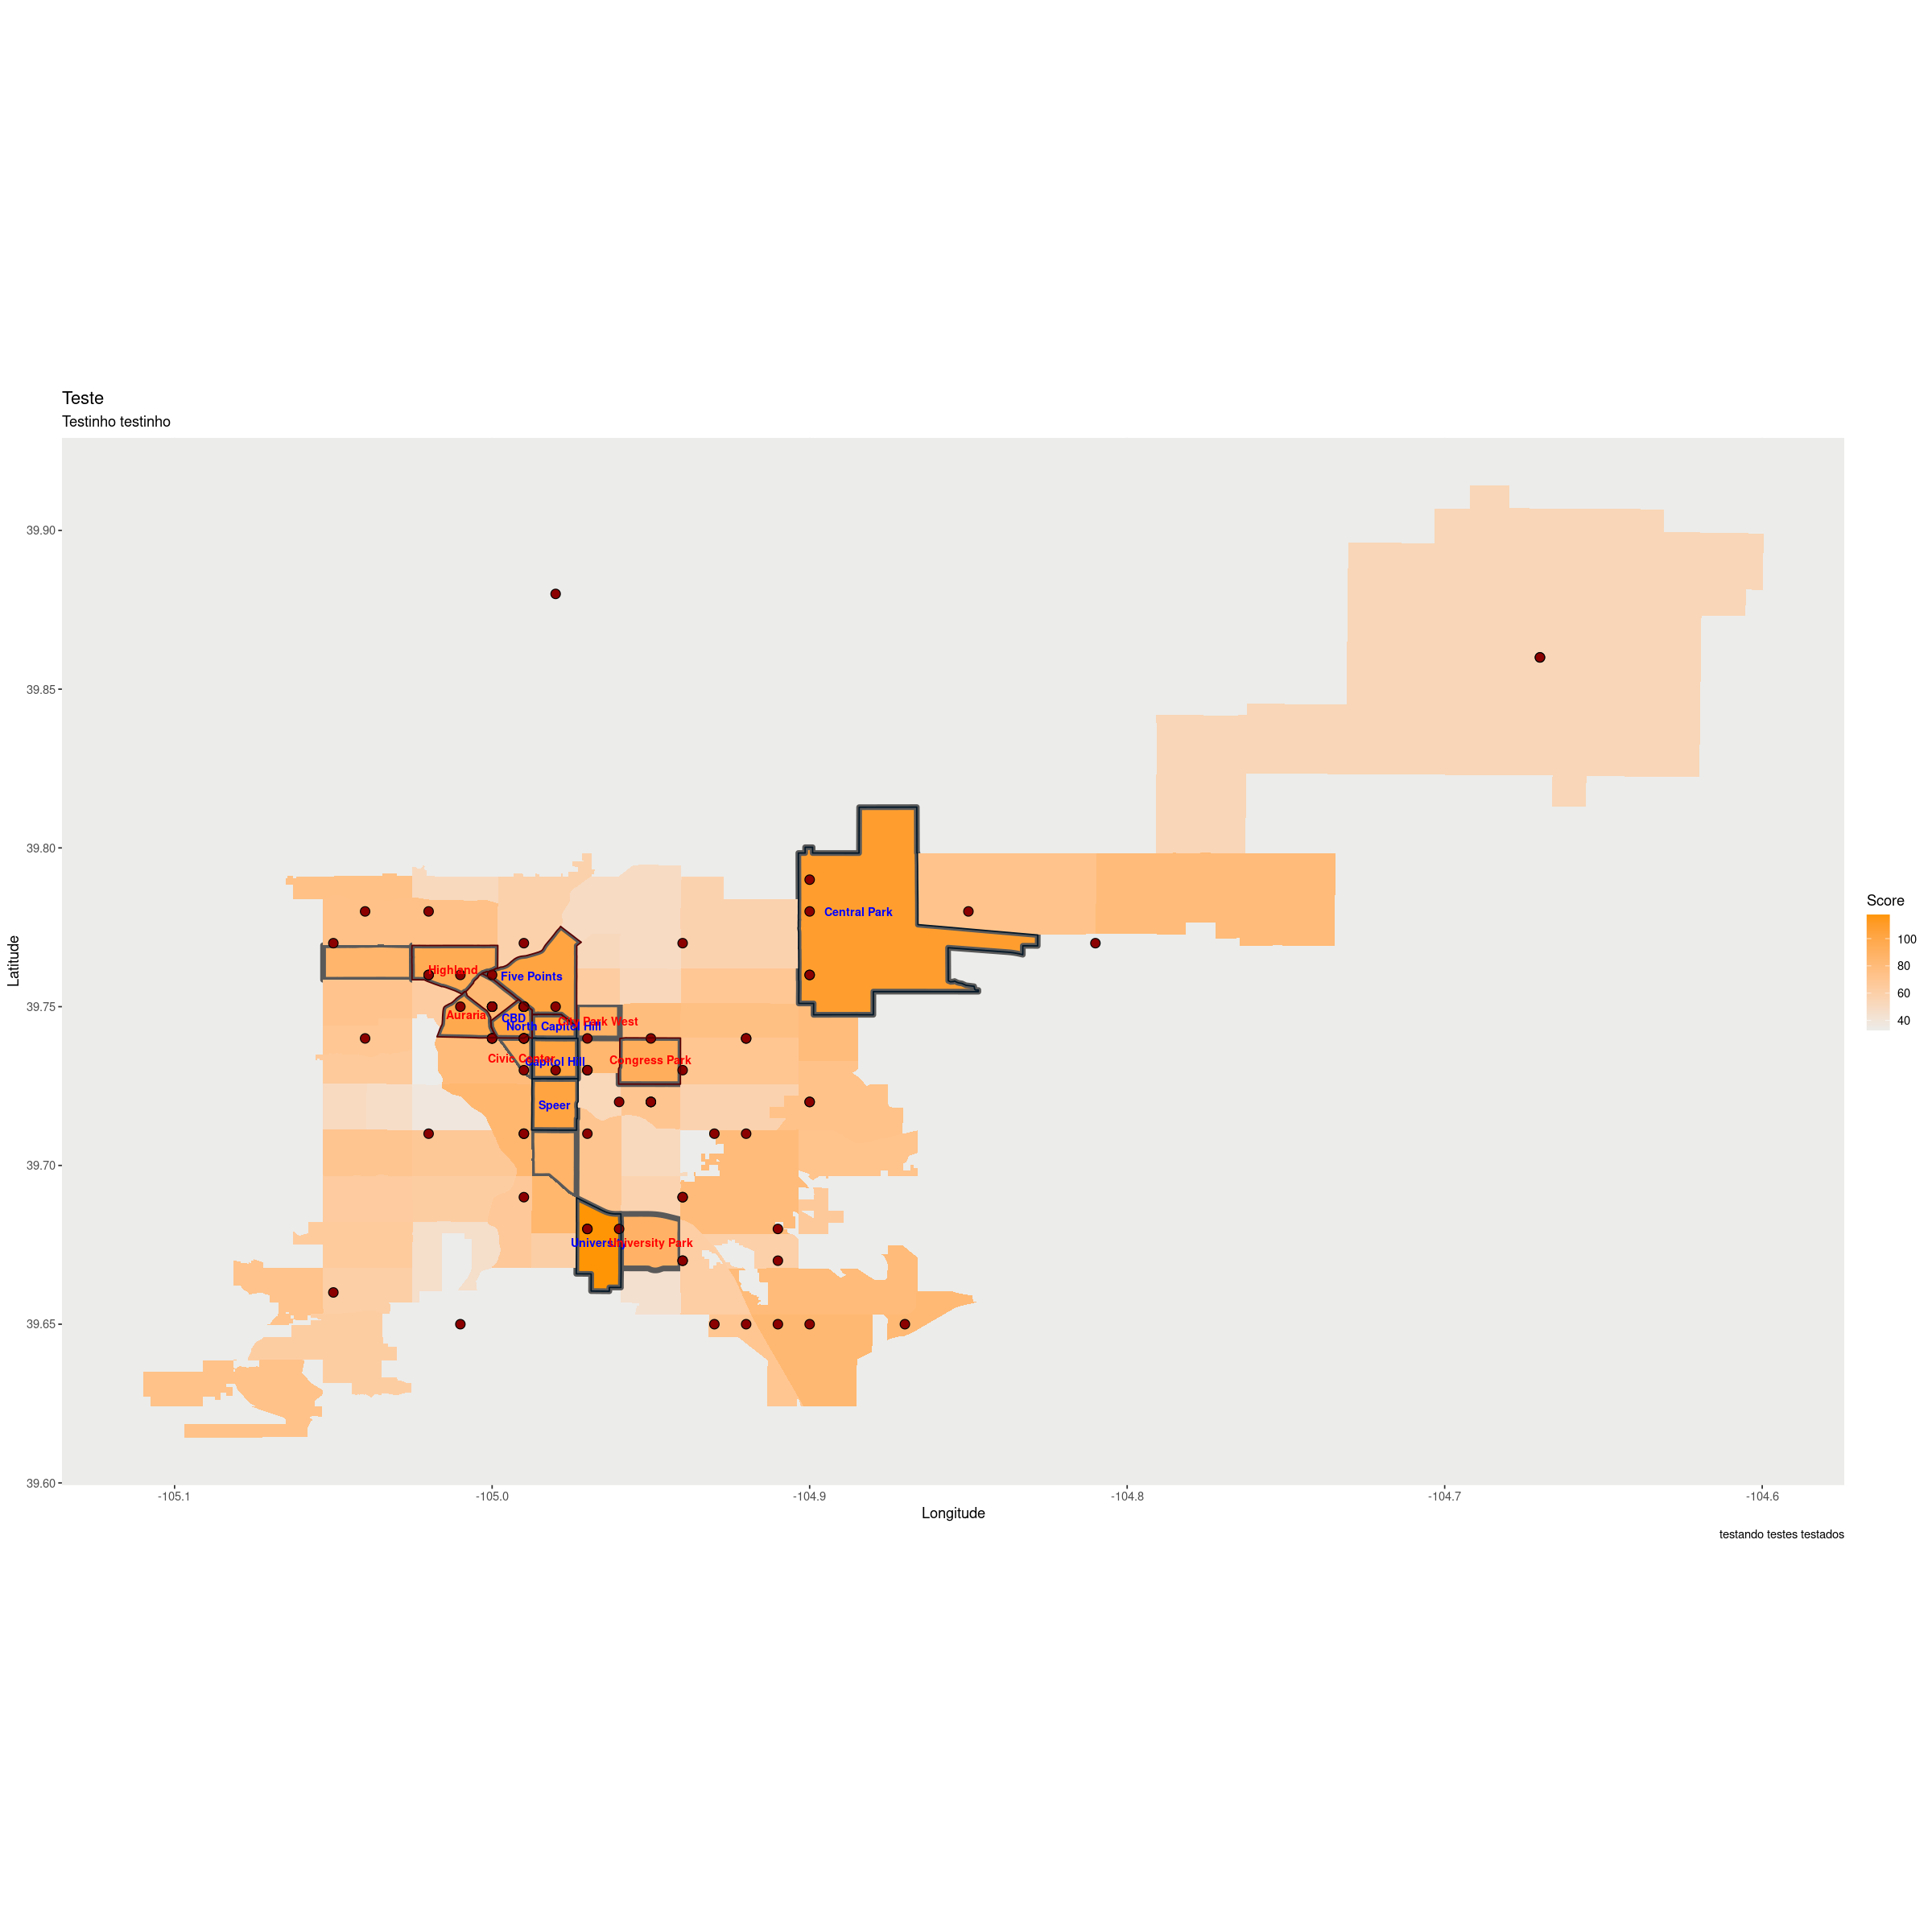

In [39]:
options(repr.plot.width = 20, repr.plot.height =20)


# Map with the best places, with the starbucks locations
p <- map_data %>% ggplot() + geom_sf(aes(fill = Score), lwd = ifelse(map_data$Score >= 85, 2, 0)) + scale_fill_gradient(low = "#ECECEA", high = "#FF9505")
p <- p + geom_point(data = denver, aes(x = Longitude, y = Latitude), size = 3,shape = 21, fill = "darkred") + 
		geom_sf(data = places_map,fill = NA, color = "#011627") +
		geom_sf(data = potplaces_map, fill = NA, color = "#5A0002") +
		geom_sf_text(aes(label = ifelse(Score >= 102.6279, NBHD_NAME, "")), size = 3, color = "blue", fontface = "bold") +
		geom_sf_text(aes(label = ifelse(Score >= 86.9728 & Score < 102.6279, NBHD_NAME, "")),
                     size = 3, color = "red",fontface = "bold") +
     	labs(title = "Teste", subtitle = "Testinho testinho", caption = "testando testes testados") +
     	theme(panel.grid.major = element_line(color = "#ECECEA", linetype = "dashed",size = 0.5),
           panel.background = element_rect(fill = "#ECECEA"))
p

# Where to open a new coffee shop?

## Contextualization
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.

Data related to our business was collected, and the informations that contains are:
* Starbucks locations in Denver
* Demographic information regarding neighborhoods in Denver


# Summary

## Demographic

The demographic information, obtained from U.S Census Bureau and Denver Official Data, can tell us if the location is appropriated for our expected demographic of 20-35 years old. In this case, will be considering the age of 18-34 years old, which is the information available. Since the number is very close to our range, it will not affect our analysis.

* In Denver, <b>30.87%</b> of the population is in the range of 18-to-34 years - a number of 185K people potential customers.
* Considering the proportions by neighbourd, the average proportion has a close number: <b>32%</b> of the residents are in this age range.
* Two places are distinguised: Harvey Park South which have only 11% percent and, and <b>Auraria</b> which has an impressionant amount of 90% 

( Map of the Demographic Distribution)

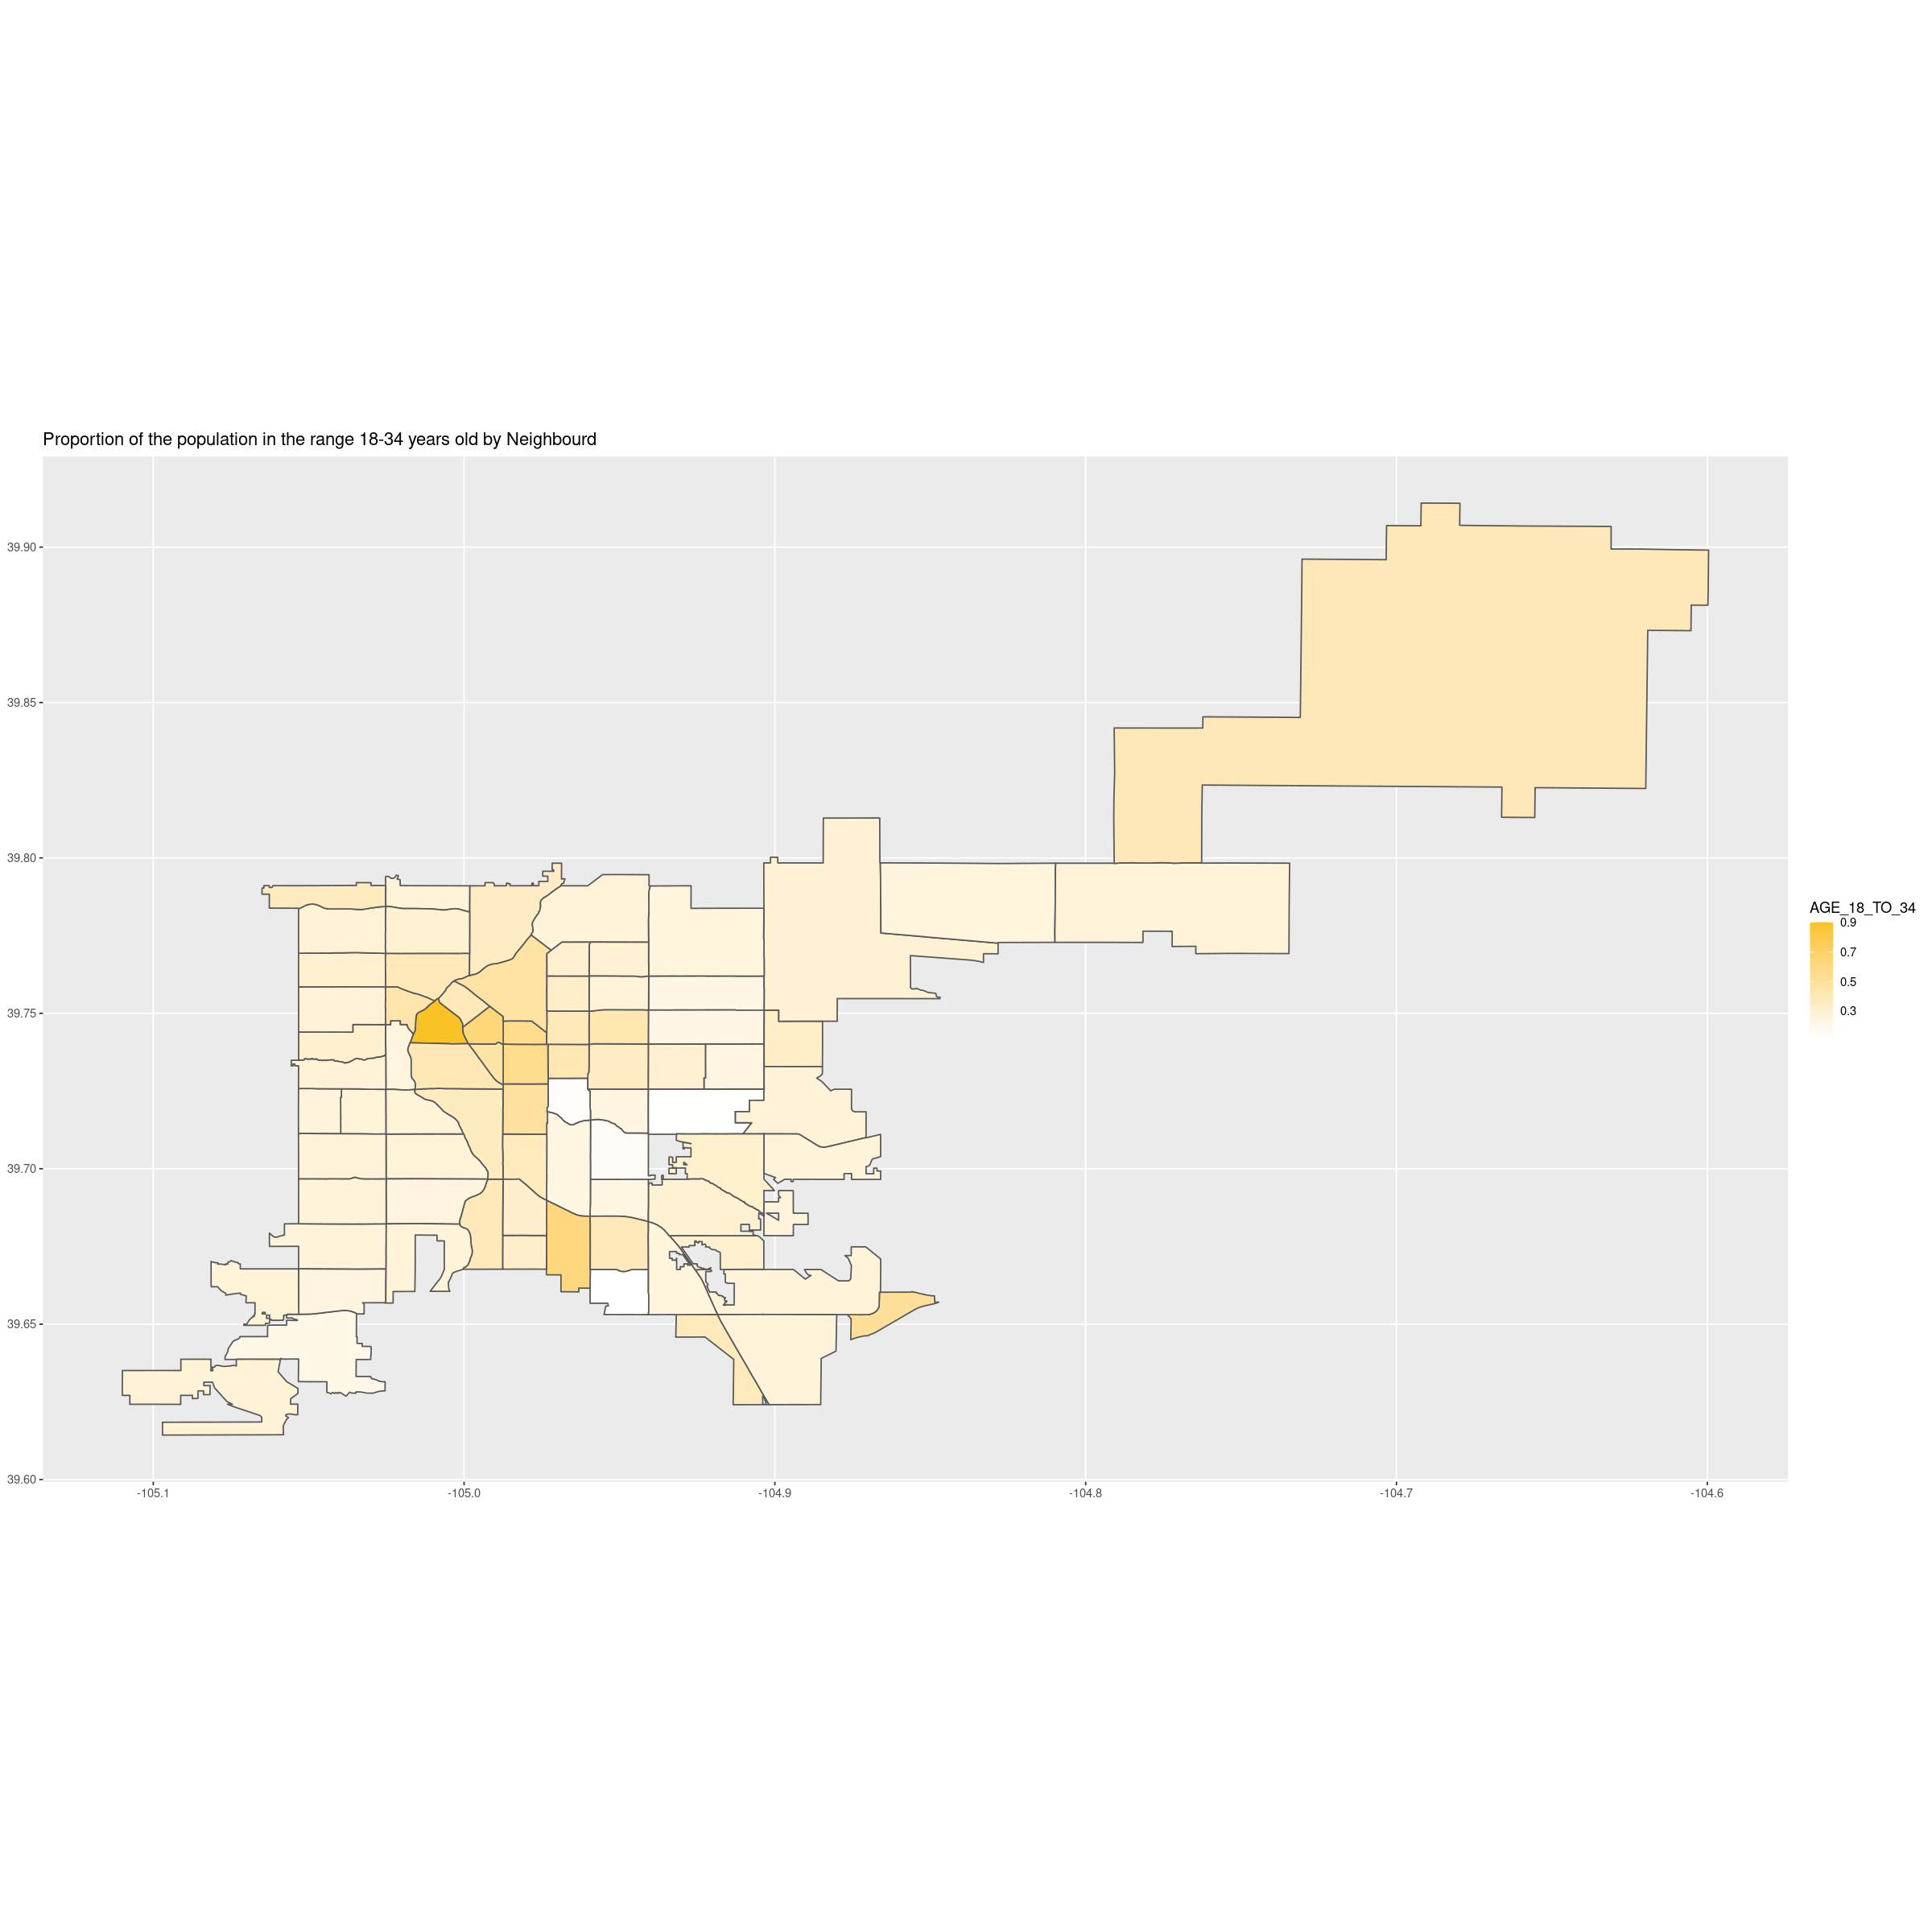

In [40]:
map_data %>% ggplot() + geom_sf(aes(fill = AGE_18_TO_34)) + scale_fill_gradient(low = "#ffffff", high = "#f9c225") + labs(title = "Proportion of the population in the range 18-34 years old by Neighbourd")

## Neighbourds Wealth

Also, we should look to places with a higher annual average income. Customers with more income possibly will have a higher spending in our coffes, resulting in more revenue. We have this information by Neighbourd.

* Looking by neighbours, in average <b>25%</b> of the residents has a income above 100k.

But, some informations of specific locations are missing. We used properly statistical techniques to estimate these values.

###### Linear Regression was used to estimate the proportion of households above 100k. The model showed a Adj. R-squared of 0.60

## Competition

Starbucks, our competior, does not compete directly with us. Even though, we should look to places where we could have the advantage of being the exclusive coffee of that location.
* There are 78 starbucks in Denver. They are distributed into more than 20 different neighborhoods.

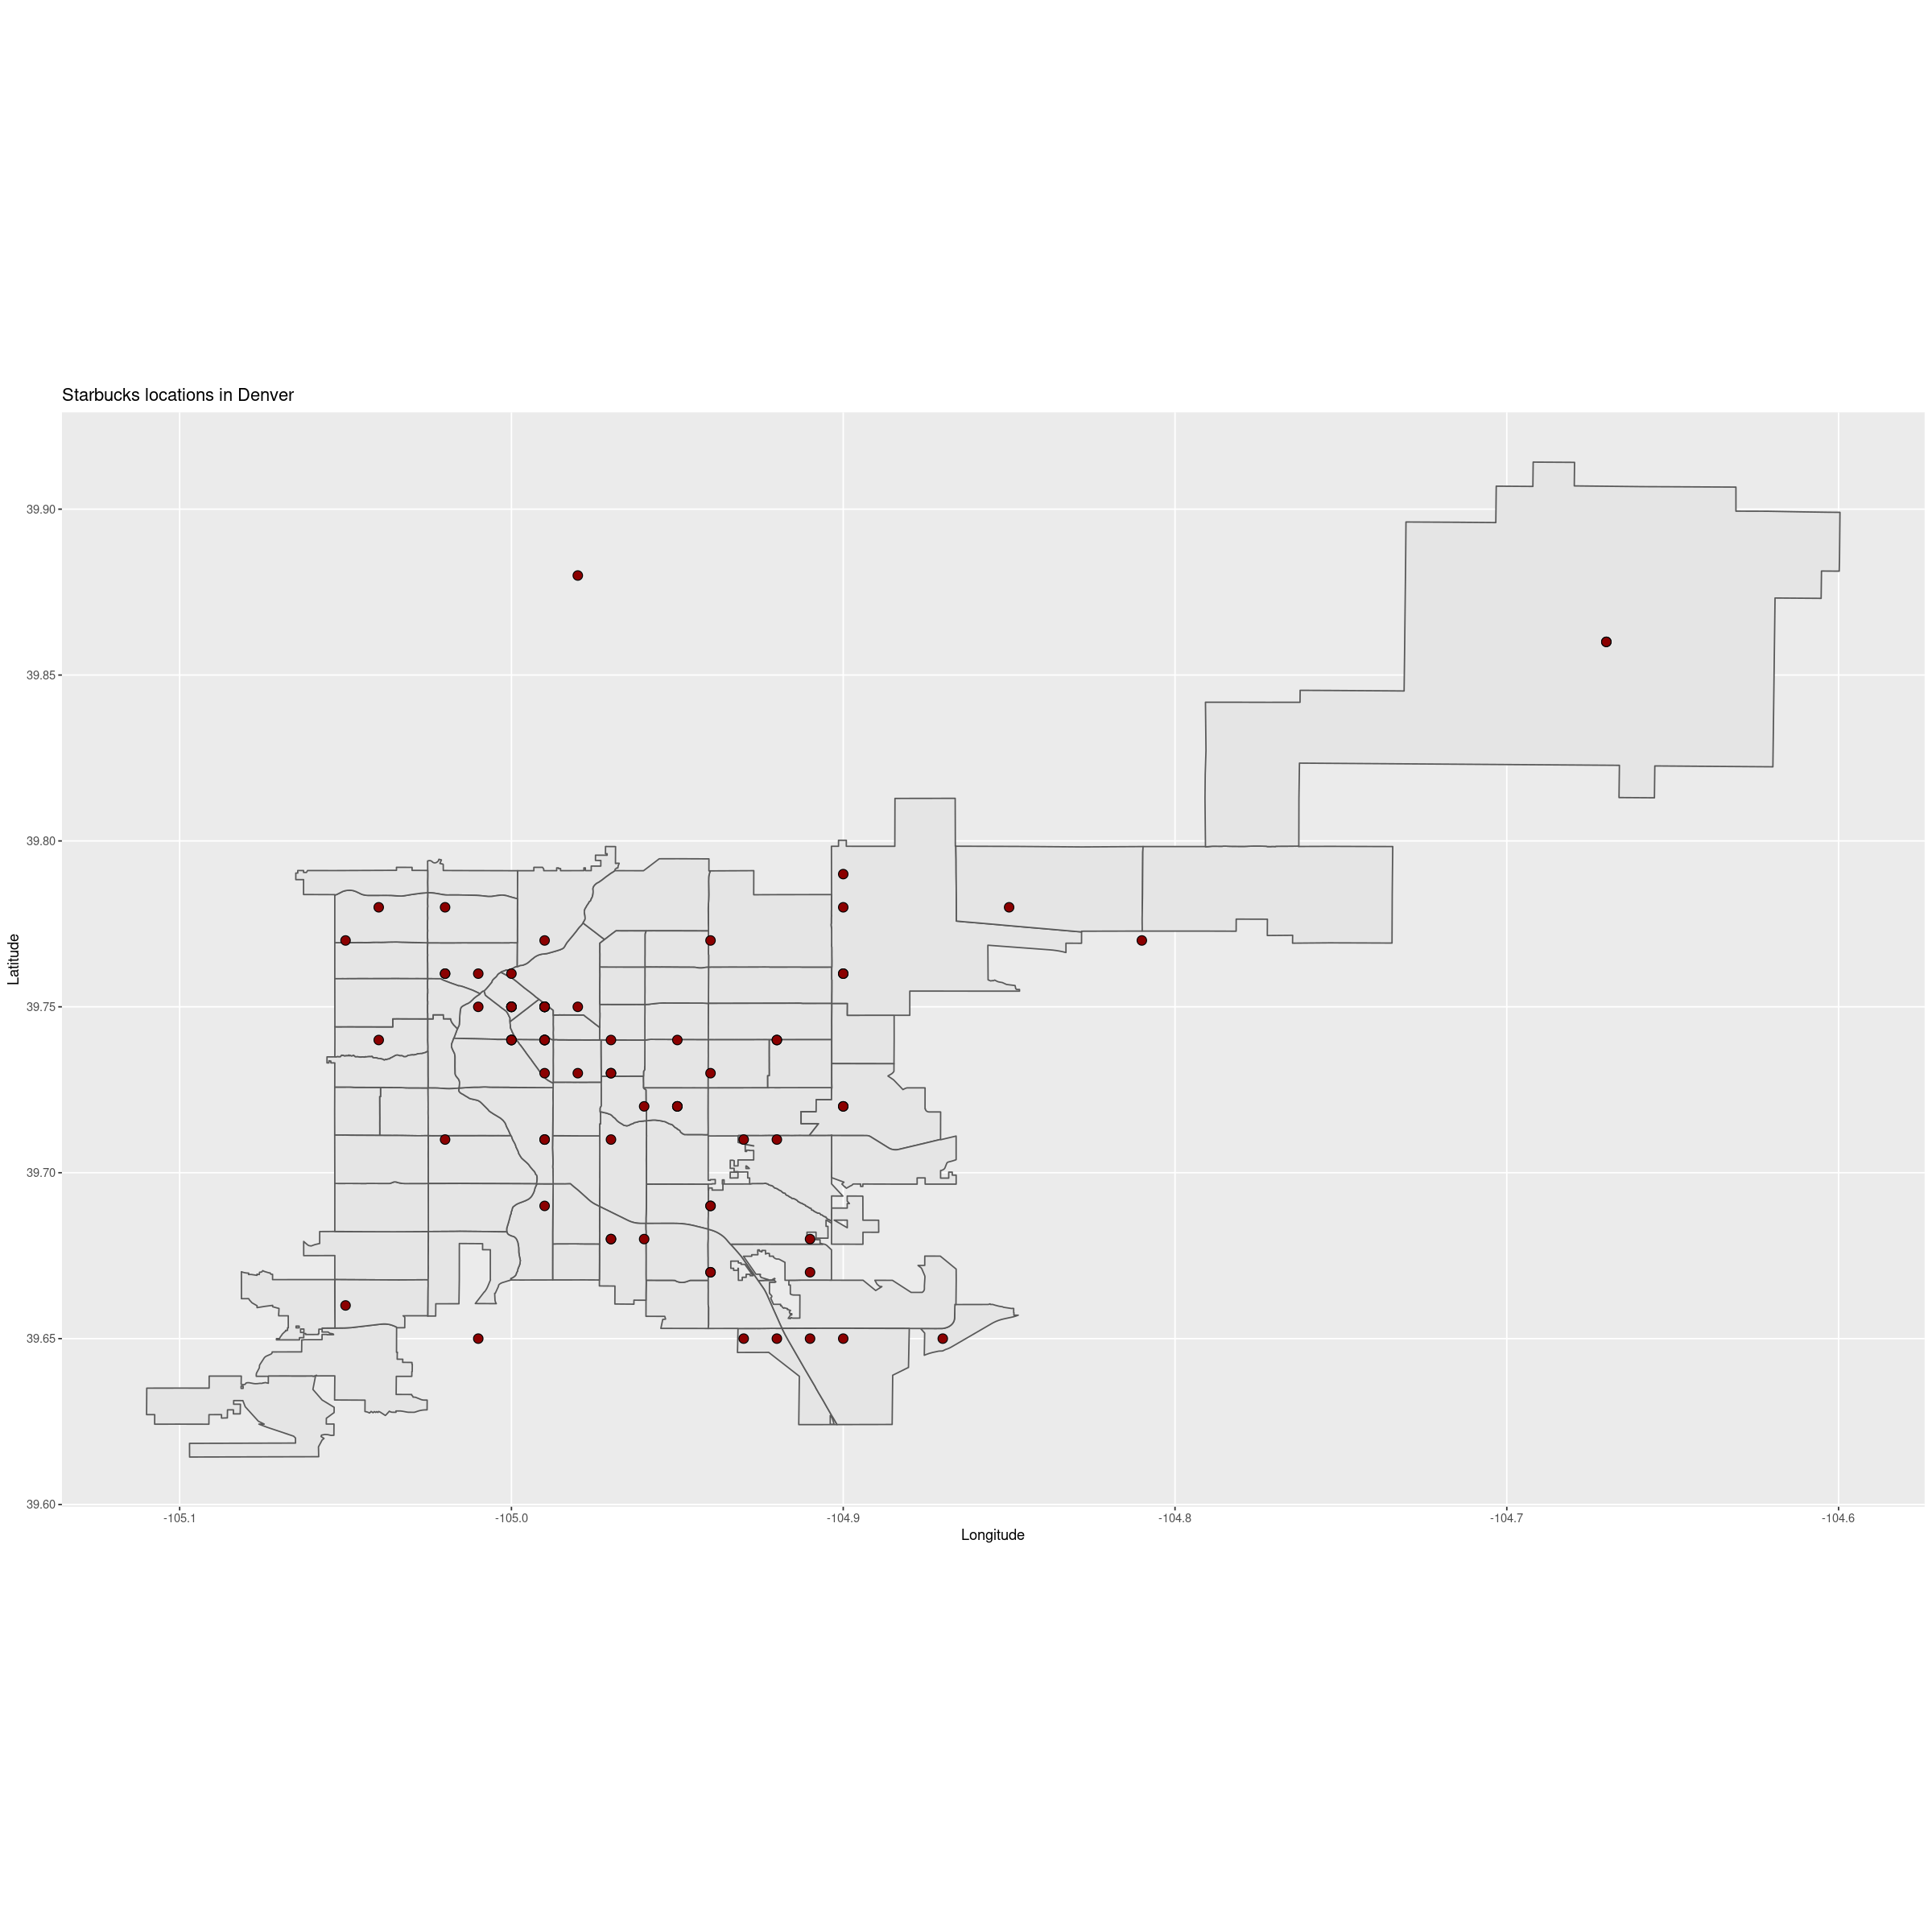

In [41]:
p2 <- map_data %>% ggplot() + geom_sf()
p2 <- p2 + geom_point(data = denver, aes(x = Longitude, y = Latitude), size = 3,shape = 21, fill = "darkred") + labs(title = "Starbucks locations in Denver")
p2

# Where to Focus On?
## Creating a Score

Since we gathered information about the locations, we can do a further analysis to specify the best locations.To do this, we attributed a score, considering the most important factors : <b>Population, Demographic and Income</b>.
* Different weights are attributed to these factors, the equation of the score is showed below: 
     ####                            Score = (AGE_18_TO_34 * 0.5 + p100k * 0.3 + (Pop/5) * 0.2)*200

The proportion of people in the 18-34 was considered the most important factor, with a 0.5 score. The proportion of people with annual income higher than 100k received a score of 0.3. The population(adjusted) of the neighborhood received a 0.2 score.

The 10 best locations, based on our score, are:

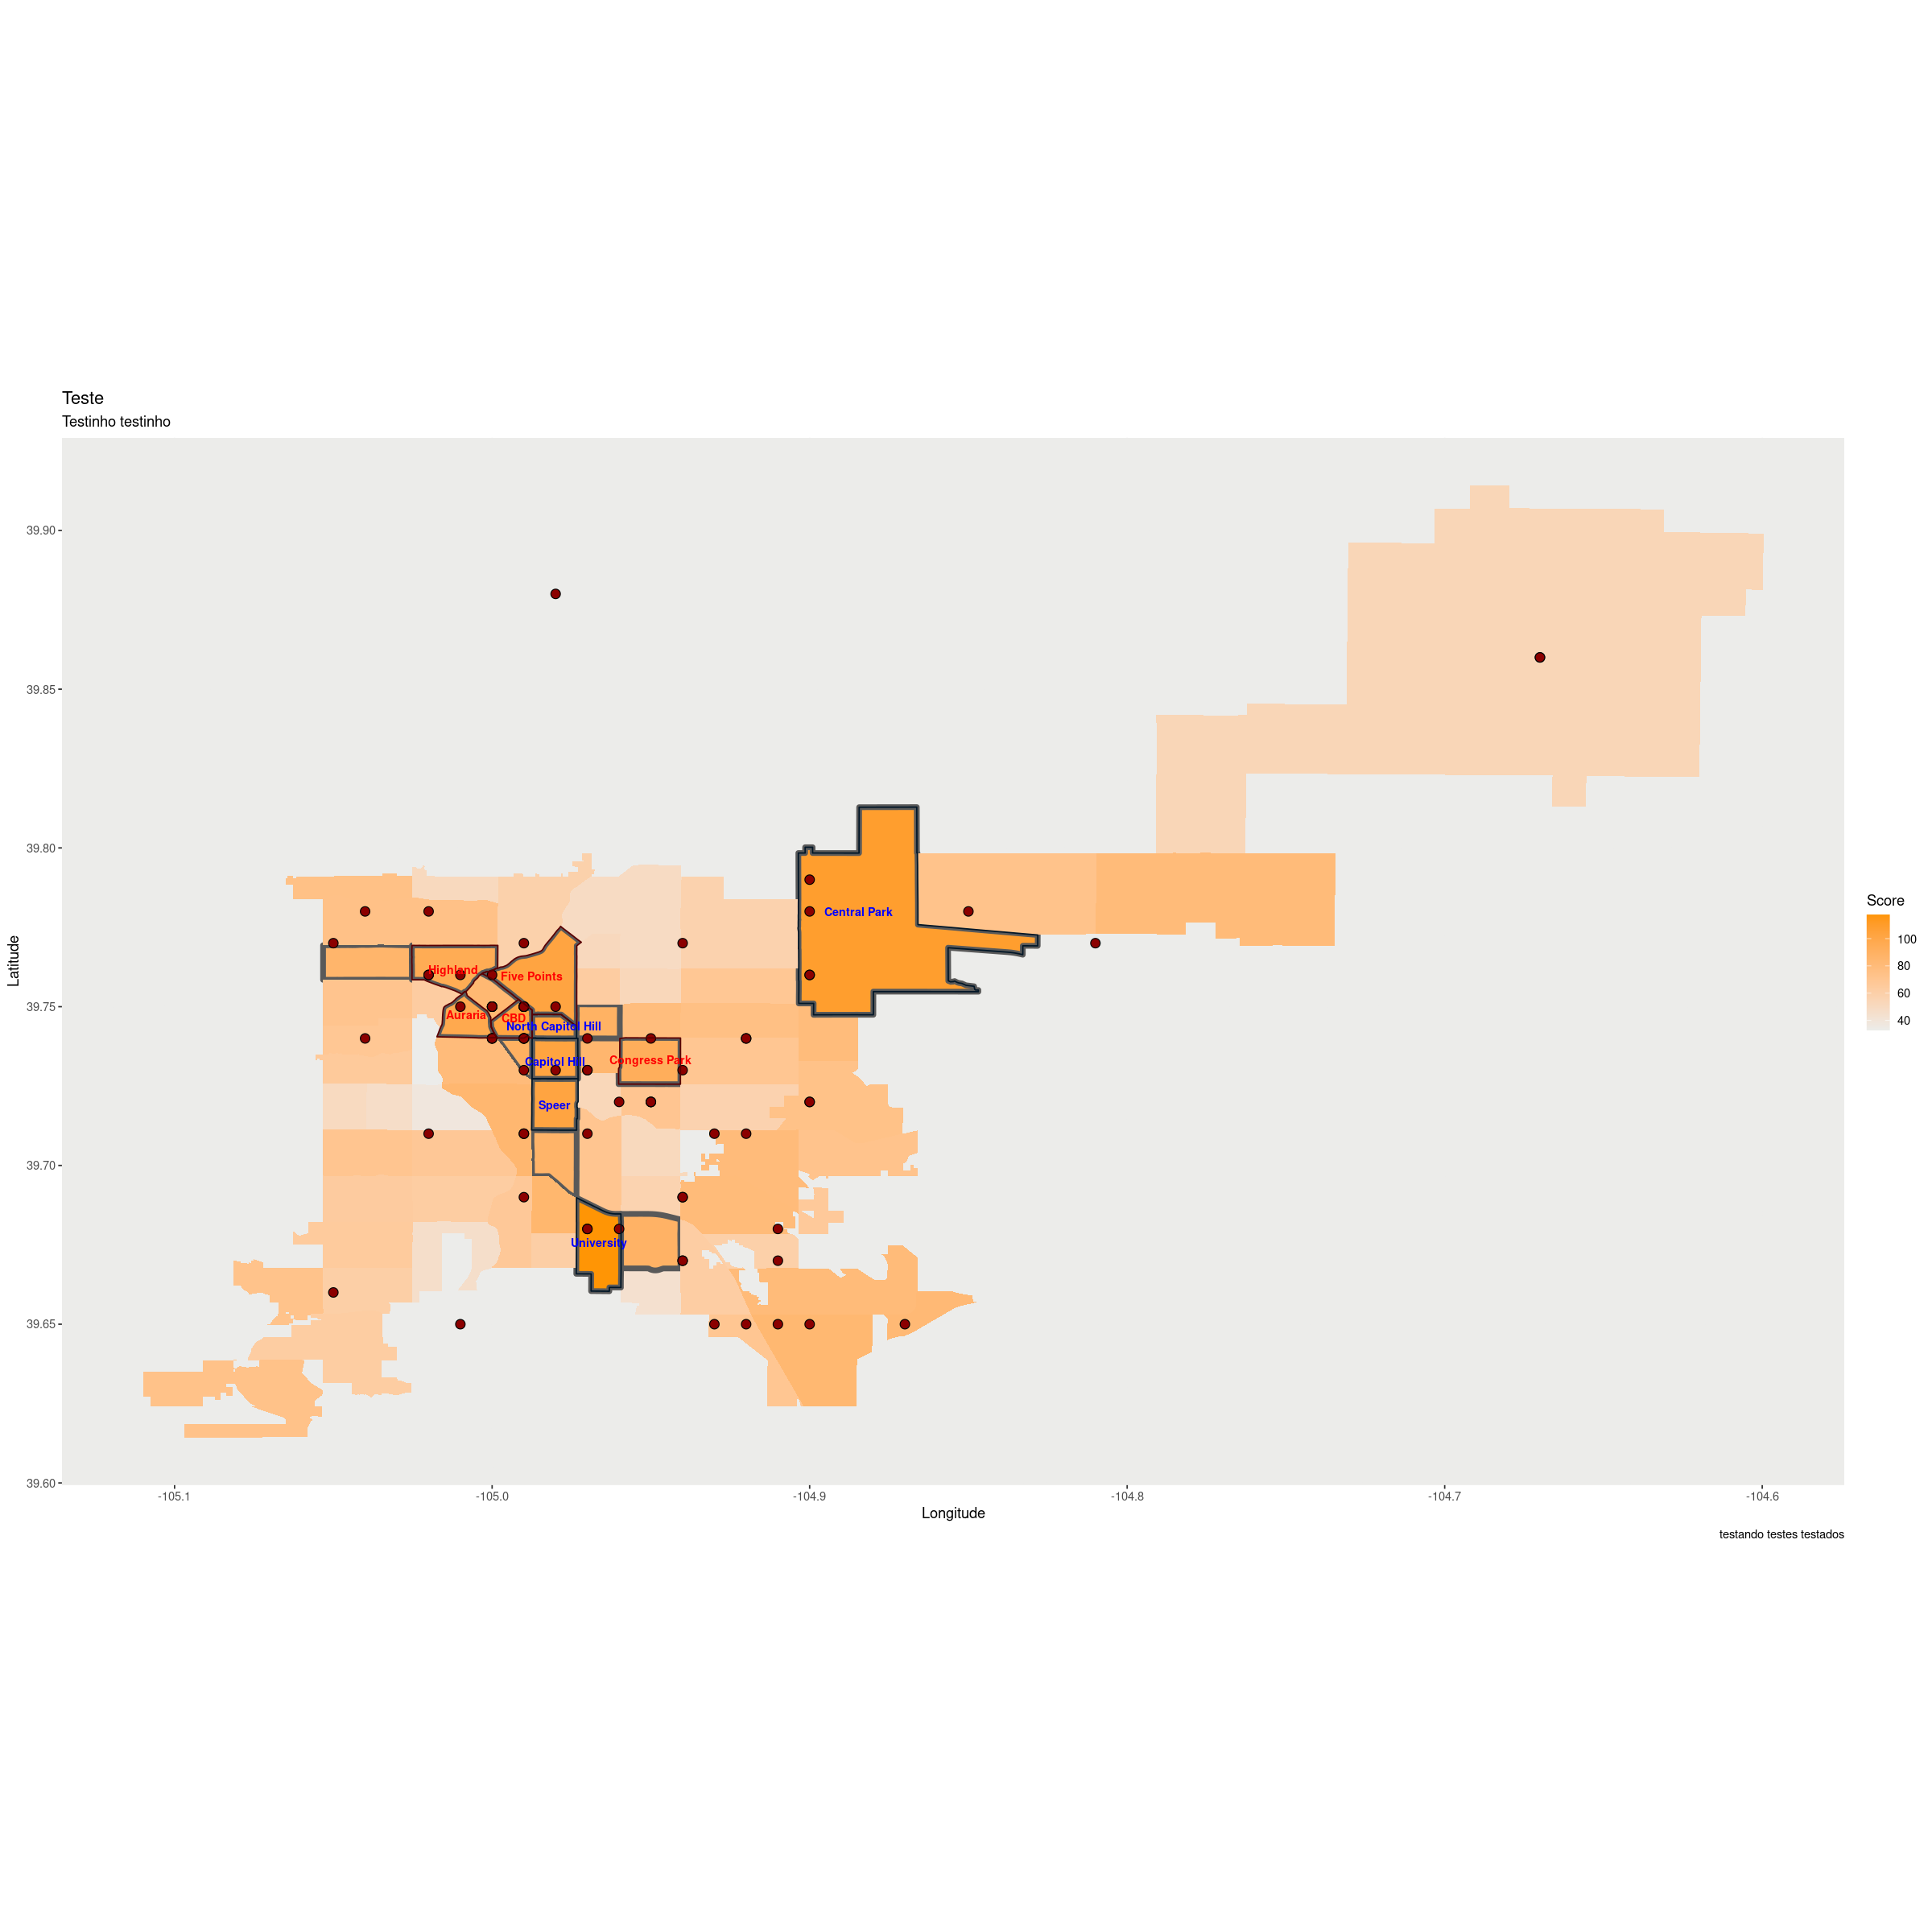

In [44]:
options(repr.plot.width = 20, repr.plot.height =20)


# Map with the best places, with the starbucks locations
p <- map_data %>% ggplot() + geom_sf(aes(fill = Score), lwd = ifelse(map_data$Score >= 85, 2, 0)) + scale_fill_gradient(low = "#ECECEA", high = "#FF9505")
p <- p + geom_point(data = denver, aes(x = Longitude, y = Latitude), size = 3,shape = 21, fill = "darkred") + 
		geom_sf(data = places_map,fill = NA, color = "#011627") +
		geom_sf(data = potplaces_map, fill = NA, color = "#5A0002") +
		geom_sf_text(aes(label = ifelse(Score >= 102.7581, NBHD_NAME, "")), size = 3, color = "blue", fontface = "bold") +
		geom_sf_text(aes(label = ifelse(Score >= 92.91 & Score < 102.7581, NBHD_NAME, "")),
                     size = 3, color = "red",fontface = "bold") +
     	labs(title = "Teste", subtitle = "Testinho testinho", caption = "testando testes testados") +
     	theme(panel.grid.major = element_line(color = "#ECECEA", linetype = "dashed",size = 0.5),
           panel.background = element_rect(fill = "#ECECEA"))
p

In [43]:
best_places

NBHD_ID,NBHD_NAME,AGE_18_TO_34,POPULATION_2010,p100k,Pcust,Pop,Score
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
64,University,0.6169600,9375,0.2636339,5784,5,117.51404
60,Central Park,0.2873530,13948,0.6715543,4008,5,109.02856
47,North Capitol Hill,0.5560708,5823,0.2622695,3238,4,103.34325
9,Capitol Hill,0.5625510,14708,0.1126566,8274,5,103.01449
59,Speer,0.4894103,10954,0.2302848,5361,5,102.75811
10,CBD,0.6271930,3648,0.2666102,2288,3,102.71591
26,Five Points,0.4689270,12712,0.2622541,5961,5,102.62795
2,Auraria,0.9007092,705,0.0000000,635,1,98.07092
36,Highland,0.3878277,8429,0.4124909,3269,4,95.53223


## Neighborhoods that should receive focus

<b> The best choice: </b> <i>Speer</i>.    Almost 50% of the population are in the desired demographic range, also, the neighborhood has 5K potential customers and 23% of the people have income above 100k. Also, theres no coffee in the proximity area - we could have the benefit of being the unique coffe in this region.

<b> Alternative safe choice: </b> <i> North Capitol Hill</i>. Very similar characteristics with Speer, but with a lesser number of potential customers,  3.2K. Also, there more coffes in the proximity area.

<b> More risky choice: </b> <i> University</i>. The highest score, 6K potential customers, 26% have annual income of 100k+. The only problem: there are already 2 coffes in the area, meaning that we probably will have more barriers to attract customers.